In [23]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
train=pd.read_csv('train_E6oV3lV.csv')
test=pd.read_csv('test_tweets_anuFYb8.csv')


In [25]:
train[train['label']==0].head(10)

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
5   6      0  [2/2] huge fan fare and big talking before the...
6   7      0   @user camping tomorrow @user @user @user @use...
7   8      0  the next school year is the year for exams.ð...
8   9      0  we won!!! love the land!!! #allin #cavs #champ...
9  10      0   @user @user welcome here !  i'm   it's so #gr...

In [26]:
train[train['label']==1].head(10)

id  label                                              tweet
13    14      1  @user #cnn calls #michigan middle school 'buil...
14    15      1  no comment!  in #australia   #opkillingbay #se...
17    18      1                             retweet if you agree! 
23    24      1    @user @user lumpy says i am a . prove it lumpy.
34    35      1  it's unbelievable that in the 21st century we'...
56    57      1            @user lets fight against  #love #peace 
68    69      1  ð©the white establishment can't have blk fol...
77    78      1  @user hey, white people: you can call people '...
82    83      1  how the #altright uses  &amp; insecurity to lu...
111  112      1  @user i'm not interested in a #linguistics tha...

In [27]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

## Clean Data 

In [28]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern, input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt 

In [29]:
df=train.append(test,ignore_index=True)

df['tidy']=np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df['tidy']=df['tidy'].str.replace("[^a-zA-Z#]"," ")
df['tidy']=df['tidy'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head(10)

<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-29-62e852bc0961>:3: DeprecationWarning: invalid escape sequence \w
  df['tidy']=np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   
5   6    0.0  [2/2] huge fan fare and big talking before the...   
6   7    0.0   @user camping tomorrow @user @user @user @use...   
7   8    0.0  the next school year is the year for exams.ð...   
8   9    0.0  we won!!! love the land!!! #allin #cavs #champ...   
9  10    0.0   @user @user welcome here !  i'm   it's so #gr...   

                                                tidy  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit cause they offer wheelchai...  
2                                bihday your majesty  
3                         #model love take with time  
4                     factsguide society #motivation  
5  huge fare talking before they leave chaos disp...  
6                             camping tomorrow danny  
7  next school year year exams think about that #...  
8  love land #allin #cavs #champions #cleveland #...  
9                                       welcome here

## Stemming

In [30]:
from nltk.stem.porter import *

tokenized=df['tidy'].apply(lambda x : x.split())
stemmer=PorterStemmer()
tokenized=tokenized.apply(lambda x: [stemmer.stem(i) for i in x])
for i in range(len(tokenized)): 
    tokenized[i]= ' '.join(tokenized[i])
df['tidy']=tokenized

## Plots

In [31]:
def plotWordcloud(df, lbl='tidy', what='all'):
    if what=='all':
        all_words = ' '.join([text for text in df[lbl]])
    else:
        all_words=what
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

def plotHist(HT):
    a = nltk.FreqDist(HT)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 10 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 10) 
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    ax.set(ylabel = 'Count')
    plt.show()

/Users/rob/.local/lib/python3.7/site-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/rob/.local/lib/python3.7/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))
/Users/rob/.local/lib/python3.7/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90


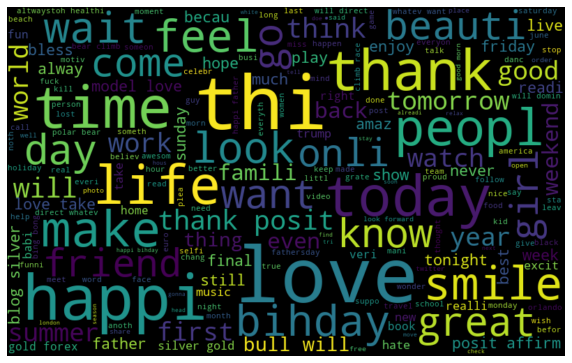

In [32]:
plotWordcloud(df, lbl='tidy')

/Users/rob/.local/lib/python3.7/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90


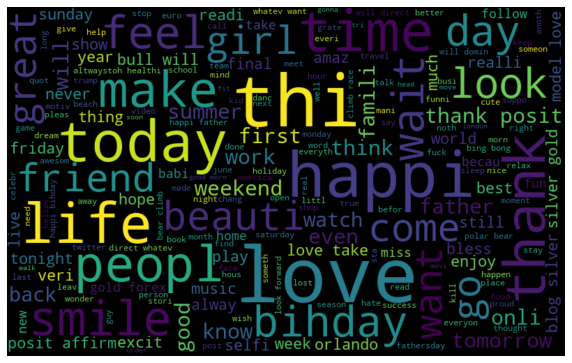

In [33]:
normal_words =' '.join([text for text in df['tidy'][df['label'] == 0]])

plotWordcloud(df, lbl='tidy',what=normal_words)

/Users/rob/.local/lib/python3.7/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90


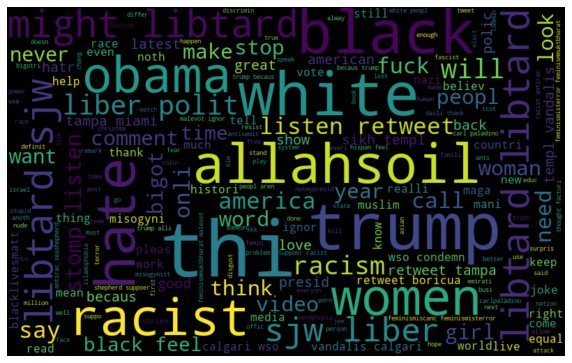

In [34]:
negative_words = ' '.join([text for text in df['tidy'][df['label'] == 1]])

plotWordcloud(df, lbl='tidy',what=negative_words)

In [38]:
# extracting hashtags from non racist/sexist tweets
HT_positive = hashtag_extract(df['tidy'][df['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['tidy'][df['label'] == 1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])


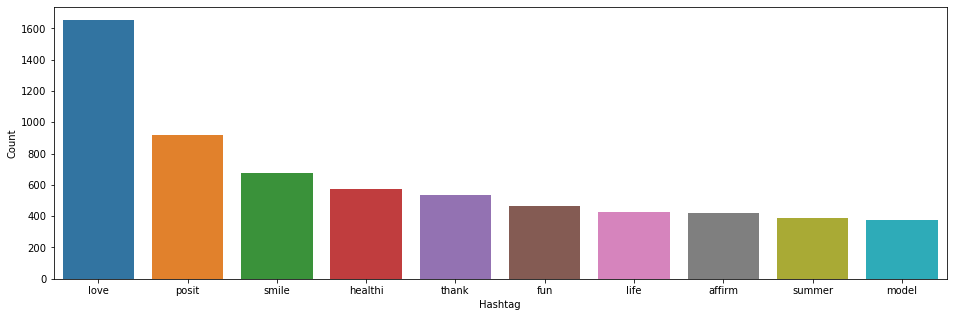

In [39]:
plotHist(HT_positive)


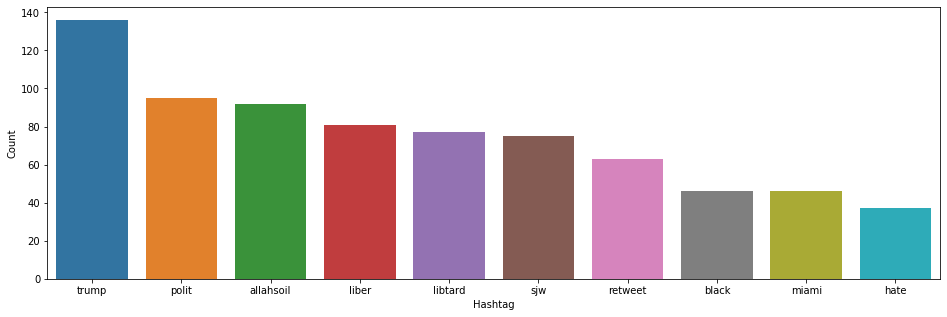

In [40]:
plotHist(HT_negative)


## Features Generation

Preprocessed data is transformed in features to be feed in ML models. Techniques of transformation 
are bag of words and Word embeddings

## Bag of words with Random Forest

In [41]:
from sklearn.feature_extraction.text import CountVectorizer 
bow_vectorizer=CountVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['tidy'])

In [42]:
from sklearn.model_selection import train_test_split
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
prediction=rf.predict(xvalid_bow)

In [44]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

## Word2Vec with RandomForest and XGBoost

In [110]:
import gensim
tokenized2=df['tidy'].apply(lambda x: x.split())
model_w2v=gensim.models.Word2Vec(tokenized,
                                 window=5,
                                 min_count=2,
                                 sg=1,
                                 hs=0,
                                 negative=10,
                                 seed=34)

In [111]:
model_w2v.train(tokenized,total_examples=len(df['tidy']),epochs=20)

(8988706, 50453740)

In [112]:
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1,size))
            count +=1
        except:
            pass;
    if count !=0:
        vec/=count
    return vec

In [113]:
wordvec_arrays=np.zeros((len(tokenized),200))
for i in range(len(tokenized)):
    wordvec_arrays[i,:]=word_vector(tokenized[i],200)
    wordvec_df=pd.DataFrame(wordvec_arrays)

In [114]:
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
xtrain_w2v=train_w2v.iloc[ytrain.index,:]
xvalid_w2v=train_w2v.iloc[yvalid.index,:]

rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_w2v,ytrain)
prediction=rf.predict(xvalid_w2v)

In [115]:
from xgboost import XGBRFClassifier
xgb_model=XGBRFClassifier(max_depth=6,n_estimators=1000).fit(xtrain_w2v,ytrain)
prediction=xgb_model.predict(xvalid_w2v)

## Sentiment Analyzer

In [69]:
def sentAnalyzer(df1, lbl_sel='Subject', lbl_out='Score'):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

    results = []

    for mtext in df1[lbl_sel]:
        pol_score = SIA().polarity_scores(mtext) # run analysis
        pol_score['headline'] = mtext # add headlines for viewing
        results.append(pol_score)
    
    df1[lbl_out] = pd.DataFrame(results)['compound']
    return df1

def getIndex(ticker='SPX'):
    import Plib.DataFarm.FRData as fr
    data1=fr.getData('indices',ticker,freq='D')
    data1['Returns'] = 100*(np.log(data1.Adjusted_close) - np.log(data1.Adjusted_close.shift(1)))
    data1['UpDown']=np.where((data1.Close-data1.Close.shift(1))>0,1,0)
    data1=data1.reset_index()
    data1['Date2'] = pd.to_datetime(data1['Date']).dt.date
    data1.drop('Date', axis=1, inplace=True)
    data1.rename(columns={'Date2':'Date'}, inplace=True)
    data1=data1.set_index('Date')
    return data1

def plotCorrSentIndex(df1, data1, lbl_index='Returns',s=1,fs=(10,8)):
    # creates a daily score by summing the scores of the individual articles in each day
    df2 = df1.groupby(['Date']).sum() 
    df2=df2[['Score']]
    #Lag the sentiment score
    df2['Lagged_Score'] = df2.shift(s)
    df3 = pd.merge(data1[[lbl_index]],df2[['Lagged_Score']], left_index=True, right_index=True, how='left')
    # replace NaN with 0 permanently
    df3.fillna(0, inplace=True) 
    #remove scores between -0.5 amd 0.5
    df4 = df3[(df3['Lagged_Score'] > 0.5) | (df3['Lagged_Score'] < -0.5)]
    df4.plot(x="Lagged_Score", y=lbl_index,style="o",figsize=fs)
    df4[lbl_index].corr(df4['Lagged_Score'])
    return df4

In [70]:
PkFile = 'newsIEX.pk'
df1=pd.read_pickle(PkFile)
df1.head(2)


Date                                            Subject Source  \
0  2020-10-01  You might need to erase and restore your iPhon...   AAPL   
1  2020-10-01  FERC Carbon Pricing Conference Highlights Stat...    EXC   

                                                body  relevant   Score  
0  Apple published a new support document on its ...         1  0.2960  
1  Pricing carbon in federally regulated electric...         1  0.4019

In [51]:
df1=sentAnalyzer(df1, lbl_sel='Subject', lbl_out='Score')

In [63]:
data1=getIndex(ticker='SPX')

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/tables/array.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (oid, self.atom, self.shape, self._v_chunkshape) = self._open_array()


UpDown  Lagged_Score
Date                            
2020-10-01       1      183.8323
2020-10-02       0      122.7037
2020-10-05       1      740.2076
2020-10-06       0      612.7881
2020-10-07       1      435.1747
2020-10-08       1      354.6099
2020-10-09       1      281.9905
2020-10-12       1      671.1880
2020-10-13       0      824.7670
2020-10-14       0      461.9290
2020-10-15       0      242.6412
2020-10-16       1      223.5531

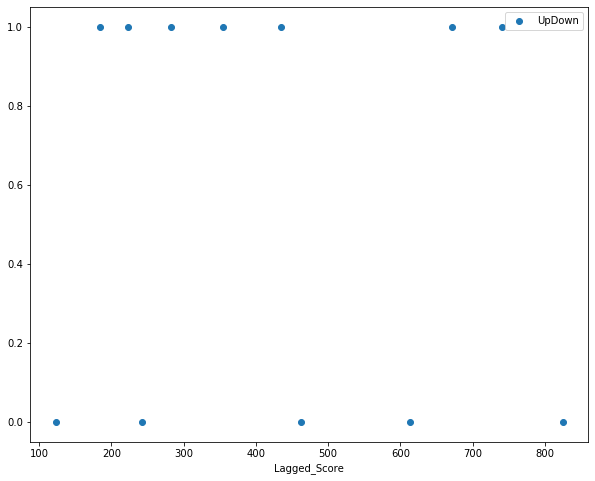

In [73]:
plotCorrSentIndex(df1, data1, s=0, lbl_index='UpDown')